In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [329]:
ads_dataset = pd.read_csv('Advertising.csv')
ads_dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [330]:
ads_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [331]:
ads_dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [332]:
tv_dataset = ads_dataset[['TV', 'Sales']]
radio_dataset = ads_dataset[['Radio', 'Sales']]
newspaper_dataset = ads_dataset[['Newspaper', 'Sales']]

In [333]:
tv_dataset.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [334]:
radio_dataset.head()

,Radio,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,12.0
3,41.3,16.5
4,10.8,17.9


In [335]:
newspaper_dataset.head()

,Newspaper,Sales
0,69.2,22.1
1,45.1,10.4
2,69.3,12.0
3,58.5,16.5
4,58.4,17.9


In [336]:
x_tv = tv_dataset.TV
y_tv = tv_dataset.Sales

In [337]:
x_tv.shape

(200,)

In [338]:
y_tv.shape

(200,)

In [339]:
X_tv = tv_dataset.TV.values
Y_tv = tv_dataset.Sales.values

In [340]:
x_tv=tv_dataset.TV.values.reshape(200,1)
y_tv=tv_dataset.Sales.values.reshape(200,1)

In [341]:
print(x_tv.shape)
print(y_tv.shape)

(200, 1)
(200, 1)


In [342]:
X_tv=np.hstack((x_tv,(np.ones(x_tv.shape))))
X_tv

array([[230.1,   1. ],
       [ 44.5,   1. ],
       [ 17.2,   1. ],
       [151.5,   1. ],
       [180.8,   1. ],
       [  8.7,   1. ],
       [ 57.5,   1. ],
       [120.2,   1. ],
       [  8.6,   1. ],
       [199.8,   1. ],
       [ 66.1,   1. ],
       [214.7,   1. ],
       [ 23.8,   1. ],
       [ 97.5,   1. ],
       [204.1,   1. ],
       [195.4,   1. ],
       [ 67.8,   1. ],
       [281.4,   1. ],
       [ 69.2,   1. ],
       [147.3,   1. ],
       [218.4,   1. ],
       [237.4,   1. ],
       [ 13.2,   1. ],
       [228.3,   1. ],
       [ 62.3,   1. ],
       [262.9,   1. ],
       [142.9,   1. ],
       [240.1,   1. ],
       [248.8,   1. ],
       [ 70.6,   1. ],
       [292.9,   1. ],
       [112.9,   1. ],
       [ 97.2,   1. ],
       [265.6,   1. ],
       [ 95.7,   1. ],
       [290.7,   1. ],
       [266.9,   1. ],
       [ 74.7,   1. ],
       [ 43.1,   1. ],
       [228. ,   1. ],
       [202.5,   1. ],
       [177. ,   1. ],
       [293.6,   1. ],
       [206

In [343]:
X_tv.shape

(200, 2)

In [344]:
x_tv_train, x_tv_test, y_tv_train, y_tv_test = train_test_split(x_tv, y_tv, test_size=0.2, random_state=42)
print(x_tv_train.shape)
print(x_tv_test.shape)
print(y_tv_train.shape)
print(y_tv_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [345]:
X_tv_train=np.hstack((x_tv_train,(np.ones(x_tv_train.shape))))
X_tv_test=np.hstack((x_tv_test,(np.ones(x_tv_test.shape))))
print(X_tv_train.shape)
print(X_tv_test.shape)
print(y_tv_train.shape)
print(y_tv_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


In [346]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(2,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]]


In [347]:
def model(X, theta):
    return X.dot(theta)

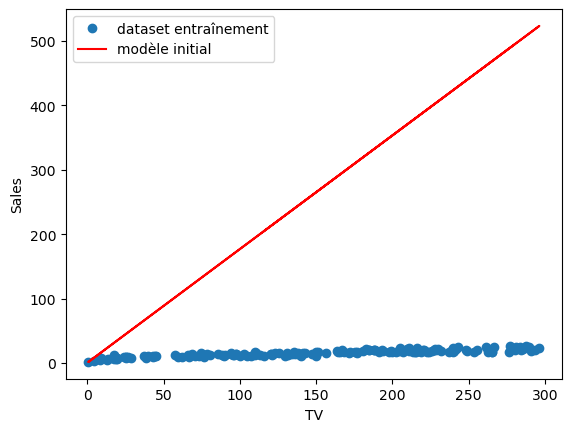

In [348]:
plt.plot(x_tv_train,y_tv_train,'o',label='dataset entraînement')
plt.plot(x_tv_train, model(X_tv_train, theta), c='r',label='modèle initial')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [349]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [350]:
cost_function(X_tv_train, y_tv_train, theta)

41517.355521861

In [351]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [352]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [353]:
n_iterations = 3000000
learning_rate = 0.00001


theta_final, cost_history = gradient_descent(X_tv_train, y_tv_train, theta, learning_rate, n_iterations)

In [354]:
cost_history

array([2.05872454e+04, 1.02105810e+04, 5.06607083e+03, ...,
       2.49922421e+00, 2.49922421e+00, 2.49922421e+00])

In [355]:
theta_final

array([[0.05550848],
       [7.0020721 ]])

In [356]:
theta_final[0]

array([0.05550848])

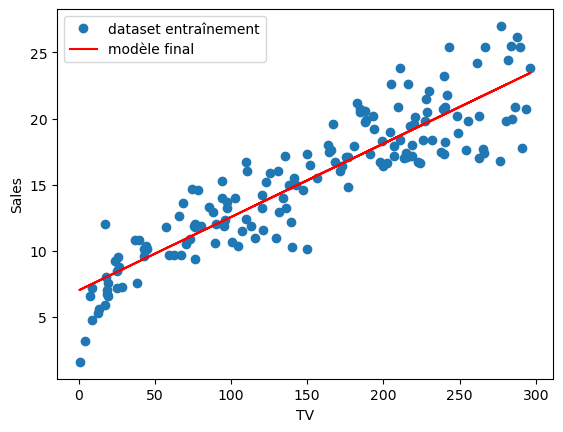

In [357]:
plt.plot(x_tv_train,y_tv_train,'o',label='dataset entraînement')
plt.plot(x_tv_train, model(X_tv_train, theta_final), c='r',label='modèle final')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

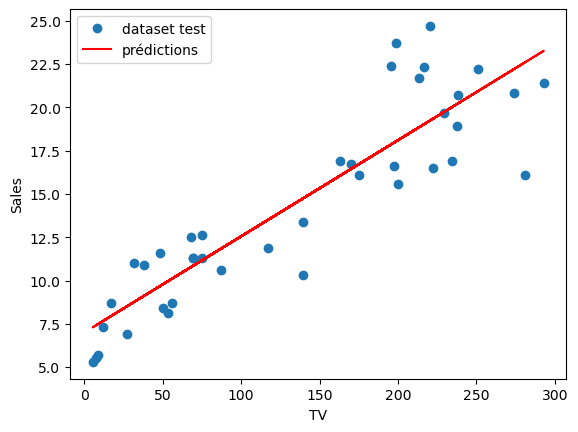

In [358]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_tv_test, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_tv_test,y_tv_test,'o',label='dataset test')
plt.plot(x_tv_test,predictions , c='r',label='prédictions')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [359]:
# Test: # prédire quelle serait les ventes pour des depense de 45.7 (TV)
X_45_7= np.array([45.7,1])
pred_y_45_7=model(X_45_7, theta_final) 
print(pred_y_45_7)

[9.53880963]


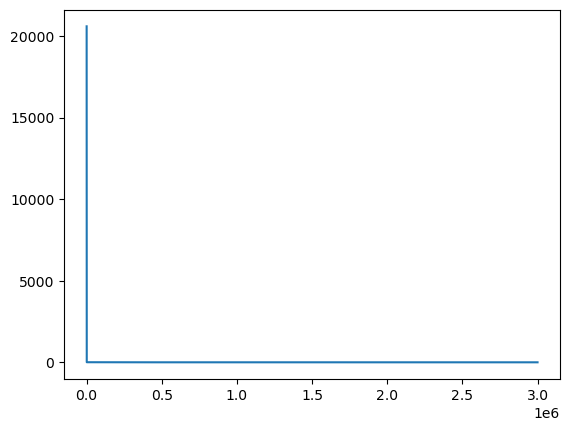

In [360]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [361]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [425]:
coef_test_tv = coef_determination(y_tv_test, predictions) # predictions=model(X_test,theta_final)
print(coef_test_tv)
coef_train_tv = coef_determination(y_tv_train, model(X_tv_train, theta_final))
print(coef_train_tv)

0.8025744457911833
0.8134863779301086


## Radio

In [364]:
x_radio = radio_dataset.Radio
y_radio = radio_dataset.Sales

In [365]:
print(x_radio.shape)
print(y_radio.shape)

(200,)
(200,)


In [366]:
X_radio = radio_dataset.Radio.values
Y_radio = radio_dataset.Sales.values

In [385]:
x_radio=radio_dataset.Radio.values.reshape(200,1)
y_radio=radio_dataset.Sales.values.reshape(200,1)
print(x_radio.shape)
print(y_radio.shape)

(200, 1)
(200, 1)


In [386]:
X_radio=np.hstack((x_radio,(np.ones(x_radio.shape))))
print(X_radio)
print(X_radio.shape)

[[37.8  1. ]
 [39.3  1. ]
 [45.9  1. ]
 [41.3  1. ]
 [10.8  1. ]
 [48.9  1. ]
 [32.8  1. ]
 [19.6  1. ]
 [ 2.1  1. ]
 [ 2.6  1. ]
 [ 5.8  1. ]
 [24.   1. ]
 [35.1  1. ]
 [ 7.6  1. ]
 [32.9  1. ]
 [47.7  1. ]
 [36.6  1. ]
 [39.6  1. ]
 [20.5  1. ]
 [23.9  1. ]
 [27.7  1. ]
 [ 5.1  1. ]
 [15.9  1. ]
 [16.9  1. ]
 [12.6  1. ]
 [ 3.5  1. ]
 [29.3  1. ]
 [16.7  1. ]
 [27.1  1. ]
 [16.   1. ]
 [28.3  1. ]
 [17.4  1. ]
 [ 1.5  1. ]
 [20.   1. ]
 [ 1.4  1. ]
 [ 4.1  1. ]
 [43.8  1. ]
 [49.4  1. ]
 [26.7  1. ]
 [37.7  1. ]
 [22.3  1. ]
 [33.4  1. ]
 [27.7  1. ]
 [ 8.4  1. ]
 [25.7  1. ]
 [22.5  1. ]
 [ 9.9  1. ]
 [41.5  1. ]
 [15.8  1. ]
 [11.7  1. ]
 [ 3.1  1. ]
 [ 9.6  1. ]
 [41.7  1. ]
 [46.2  1. ]
 [28.8  1. ]
 [49.4  1. ]
 [28.1  1. ]
 [19.2  1. ]
 [49.6  1. ]
 [29.5  1. ]
 [ 2.   1. ]
 [42.7  1. ]
 [15.5  1. ]
 [29.6  1. ]
 [42.8  1. ]
 [ 9.3  1. ]
 [24.6  1. ]
 [14.5  1. ]
 [27.5  1. ]
 [43.9  1. ]
 [30.6  1. ]
 [14.3  1. ]
 [33.   1. ]
 [ 5.7  1. ]
 [24.6  1. ]
 [43.7  1. ]
 [ 1.6  1. ]

In [387]:
x_radio_train, x_radio_test, y_radio_train, y_radio_test = train_test_split(x_radio, y_radio, test_size=0.2, random_state=42)
print(x_radio_train.shape)
print(x_radio_test.shape)
print(y_radio_train.shape)
print(y_radio_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [388]:
X_radio_train=np.hstack((x_radio_train,(np.ones(x_radio_train.shape))))
X_radio_test=np.hstack((x_radio_test,(np.ones(x_radio_test.shape))))
print(X_radio_train.shape)
print(X_radio_test.shape)
print(y_radio_train.shape)
print(y_radio_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


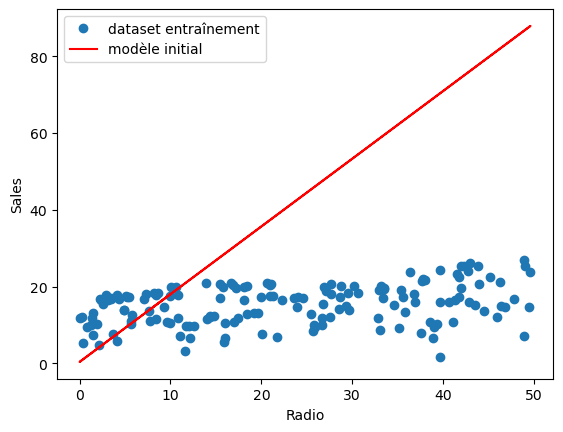

In [389]:
plt.plot(x_radio_train,y_radio_train,'o',label='dataset entraînement')
plt.plot(x_radio_train, model(X_radio_train, theta), c='r',label='modèle initial')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [390]:
cost_function(X_radio_train, y_radio_train, theta)

629.3835846941762

In [391]:
n_iterations = 3000000
learning_rate = 0.00001


theta_final_radio, cost_history_radio = gradient_descent(X_radio_train, y_radio_train, theta, learning_rate, n_iterations)

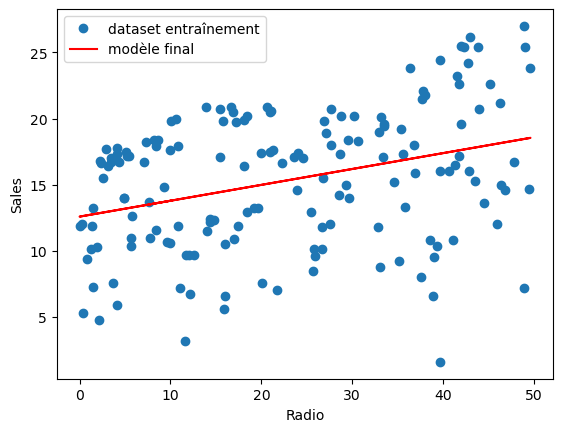

In [392]:
plt.plot(x_radio_train,y_radio_train,'o',label='dataset entraînement')
plt.plot(x_radio_train, model(X_radio_train, theta_final_radio), c='r',label='modèle final')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

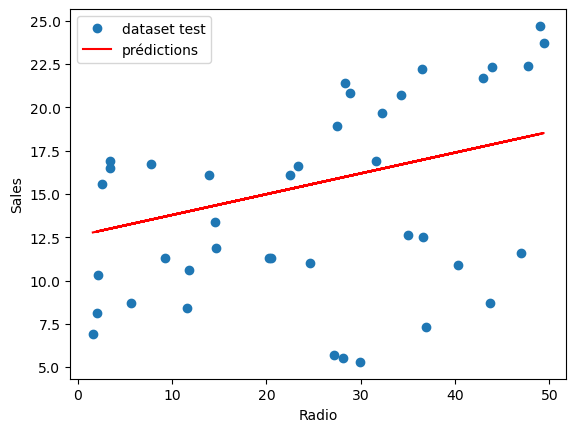

In [393]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions_radio = model(X_radio_test, theta_final_radio)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_radio_test,y_radio_test,'o',label='dataset test')
plt.plot(x_radio_test,predictions_radio , c='r',label='prédictions')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [394]:
# Test: # prédire quelle serait les ventes pour des depense de 45.7 (TV)
X_45_7= np.array([45.7,1])
pred_y_45_7=model(X_45_7, theta_final_radio) 
print(pred_y_45_7)

[18.07032677]


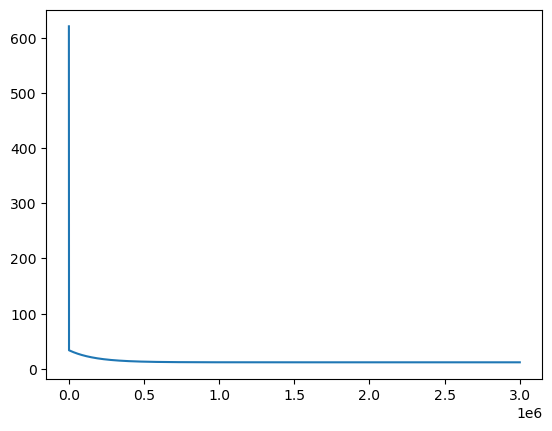

In [395]:
plt.plot(range(n_iterations), cost_history_radio)
plt.show()

In [426]:
coef_radio_test = coef_determination(y_radio_test, predictions_radio)
print(coef_radio_test)
coef_radio_train = coef_determination(y_radio_train, model(X_radio_train, theta_final_radio))
print(coef_radio_train)

0.10702965412967036
0.11704492652440235


## Newspaper

In [401]:
x_np = newspaper_dataset.Newspaper
y_np = newspaper_dataset.Sales
print(x_np.shape)
print(y_np.shape)

(200,)
(200,)


In [404]:
X_np = newspaper_dataset.Newspaper.values
Y_np = newspaper_dataset.Sales.values

In [405]:
x_np=newspaper_dataset.Newspaper.values.reshape(200,1)
y_np=newspaper_dataset.Sales.values.reshape(200,1)
print(x_np.shape)
print(y_np.shape)

(200, 1)
(200, 1)


In [406]:
X_np=np.hstack((x_np,(np.ones(x_np.shape))))
print(X_np)
print(X_np.shape)

[[ 69.2   1. ]
 [ 45.1   1. ]
 [ 69.3   1. ]
 [ 58.5   1. ]
 [ 58.4   1. ]
 [ 75.    1. ]
 [ 23.5   1. ]
 [ 11.6   1. ]
 [  1.    1. ]
 [ 21.2   1. ]
 [ 24.2   1. ]
 [  4.    1. ]
 [ 65.9   1. ]
 [  7.2   1. ]
 [ 46.    1. ]
 [ 52.9   1. ]
 [114.    1. ]
 [ 55.8   1. ]
 [ 18.3   1. ]
 [ 19.1   1. ]
 [ 53.4   1. ]
 [ 23.5   1. ]
 [ 49.6   1. ]
 [ 26.2   1. ]
 [ 18.3   1. ]
 [ 19.5   1. ]
 [ 12.6   1. ]
 [ 22.9   1. ]
 [ 22.9   1. ]
 [ 40.8   1. ]
 [ 43.2   1. ]
 [ 38.6   1. ]
 [ 30.    1. ]
 [  0.3   1. ]
 [  7.4   1. ]
 [  8.5   1. ]
 [  5.    1. ]
 [ 45.7   1. ]
 [ 35.1   1. ]
 [ 32.    1. ]
 [ 31.6   1. ]
 [ 38.7   1. ]
 [  1.8   1. ]
 [ 26.4   1. ]
 [ 43.3   1. ]
 [ 31.5   1. ]
 [ 35.7   1. ]
 [ 18.5   1. ]
 [ 49.9   1. ]
 [ 36.8   1. ]
 [ 34.6   1. ]
 [  3.6   1. ]
 [ 39.6   1. ]
 [ 58.7   1. ]
 [ 15.9   1. ]
 [ 60.    1. ]
 [ 41.4   1. ]
 [ 16.6   1. ]
 [ 37.7   1. ]
 [  9.3   1. ]
 [ 21.4   1. ]
 [ 54.7   1. ]
 [ 27.3   1. ]
 [  8.4   1. ]
 [ 28.9   1. ]
 [  0.9   1. ]
 [  2.2   

In [407]:
x_np_train, x_np_test, y_np_train, y_np_test = train_test_split(x_np, y_np, test_size=0.2, random_state=42)
print(x_np_train.shape)
print(x_np_test.shape)
print(y_np_train.shape)
print(y_np_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [408]:
X_np_train=np.hstack((x_np_train,(np.ones(x_np_train.shape))))
X_np_test=np.hstack((x_np_test,(np.ones(x_np_test.shape))))
print(X_np_train.shape)
print(X_np_test.shape)
print(y_np_train.shape)
print(y_np_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


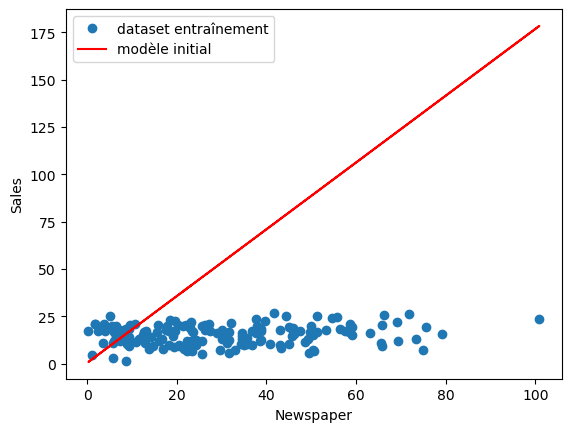

In [409]:
plt.plot(x_np_train,y_np_train,'o',label='dataset entraînement')
plt.plot(x_np_train, model(X_np_train, theta), c='r',label='modèle initial')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [410]:
cost_function(X_np_train, y_np_train, theta)

1343.940872753667

In [411]:
n_iterations = 1000000
learning_rate = 0.00001


theta_final_np, cost_history_np = gradient_descent(X_np_train, y_np_train, theta, learning_rate, n_iterations)

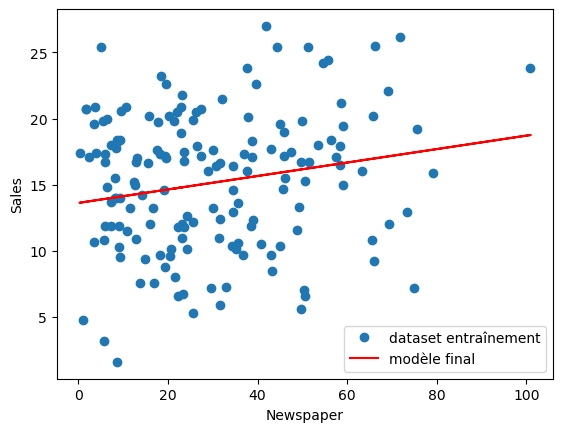

In [412]:
plt.plot(x_np_train,y_np_train,'o',label='dataset entraînement')
plt.plot(x_np_train, model(X_np_train, theta_final_np), c='r',label='modèle final')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

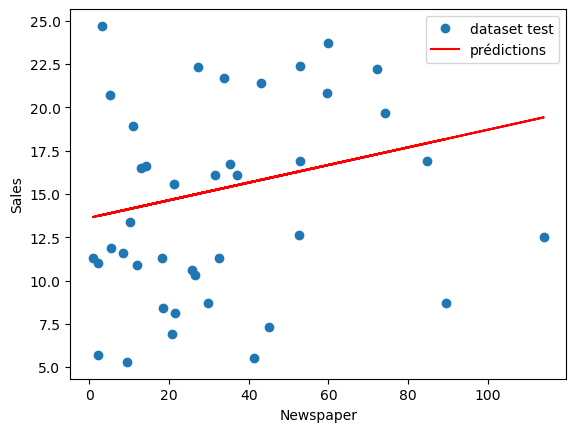

In [413]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions_np = model(X_np_test, theta_final_np)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_np_test,y_np_test,'o',label='dataset test')
plt.plot(x_np_test,predictions_np , c='r',label='prédictions')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

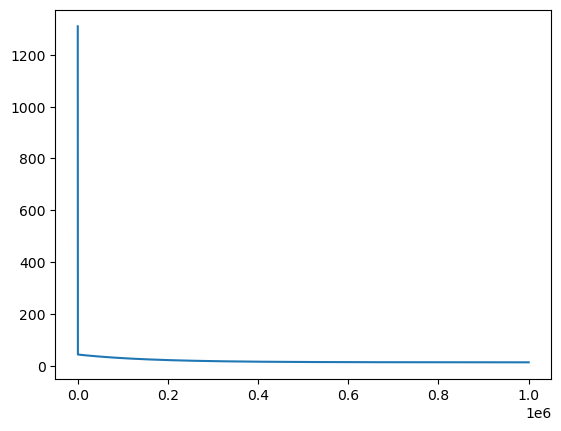

In [415]:
plt.plot(range(n_iterations), cost_history_np)
plt.show()

In [427]:
coef_np_test = coef_determination(y_np_test, predictions_np)
print(coef_np_test)
coef_np_train = coef_determination(y_np_train, model(X_np_train, theta_final_np))
print(coef_np_train)

0.014945376940943889
0.016988322506729103


In [428]:
print(coef_test_tv)
print(coef_radio_test)
print(coef_np_test)

0.8025744457911833
0.10702965412967036
0.014945376940943889


In [429]:
print(coef_train_tv)
print(coef_radio_train)
print(coef_np_train)

0.8134863779301086
0.11704492652440235
0.016988322506729103


In [430]:
print(tv_dataset.corr().Sales.TV)
print(radio_dataset.corr().Sales.Radio)
print(newspaper_dataset.corr().Sales.Newspaper)

0.9012079133023315
0.34963109700766926
0.15796002615492621


In [433]:
data = {
    'TV': [coef_test_tv, coef_train_tv, tv_dataset.corr().Sales.TV],
    'Radio': [coef_radio_test, coef_radio_train, radio_dataset.corr().Sales.Radio],
    'Newspaper': [coef_np_test, coef_np_train, newspaper_dataset.corr().Sales.Newspaper]
}
# Define the row and column labels
rows = ['Coefficient Test', 'Coefficient Train', 'Correlation']
columns = ['TV', 'Radio', 'Newspaper']

# Create the DataFrame
df = pd.DataFrame(data, index=rows, columns=columns)
print(df)

                         TV     Radio  Newspaper
Coefficient Test   0.802574  0.107030   0.014945
Coefficient Train  0.813486  0.117045   0.016988
Correlation        0.901208  0.349631   0.157960
